In [1]:
import vk # модуль для работы с API ВКонтакте
import time # модуль для работы со временем
from datetime import datetime # модуль для работы с датой и временем
from dateutil.relativedelta import relativedelta # модуль для работы с датами, в нашем случае для расчета разницы между двумя датами
import pandas as pd # модуль для обработки и анализа данных
from beautifultable import BeautifulTable # модуль для простой печати табличных данных
import matplotlib.pyplot as plt # модуль для визуализации данных
import numpy as np # модуль для работы с общими математическими и числовыми операциями
from collections import Counter # модуль специализированных типов данных
import requests

In [9]:
access_token='vk1.a.HnVACdO9H_fxJ0j4TTtqimJ_TbRT0A_8pKEb3hCNhpVwsnW7CB8phSHzvJdb-dgfjKn-QFoS1H-rqf9MkeVGIWrqF5NsDrflYonv1SQdloQDie9PWC4V5HH-SwpCZSZoJDgedCn4V2aYO1ty3f_aSErRn2PDAfll0fTRoDfl5x5heCtujwqTeT3S-36NmUqA'
vk_api = vk.API(access_token=access_token)

users = [47602808, 333726, 1387652, 4157442, 1514793, 1587593, 302476013, 1718899, 55432, 125529] #107174

list_of_users = vk_api.users.get(v=5.131, user_ids=users, fields='bdate, sex, city, country, education, career, occupation')
print(list_of_users)

[{'id': 47602808, 'bdate': '8.2', 'city': {'id': 1, 'title': 'Москва'}, 'country': {'id': 1, 'title': 'Россия'}, 'occupation': {'name': 'Крупная софтверная компания', 'type': 'work'}, 'career': [{'city_id': 1, 'company': 'Крупная софтверная компания', 'country_id': 1, 'position': 'Дизайнер'}], 'university': 0, 'university_name': '', 'faculty': 0, 'faculty_name': '', 'graduation': 0, 'sex': 2, 'first_name': 'Кирилл', 'last_name': 'Бон', 'can_access_closed': True, 'is_closed': False}, {'id': 333726, 'city': {'id': 114, 'title': 'Псков'}, 'country': {'id': 1, 'title': 'Россия'}, 'career': [], 'university': 0, 'university_name': '', 'faculty': 0, 'faculty_name': '', 'graduation': 0, 'sex': 2, 'first_name': 'Николай', 'last_name': 'Петров', 'can_access_closed': True, 'is_closed': False}, {'id': 1387652, 'bdate': '1.3.1986', 'city': {'id': 1, 'title': 'Москва'}, 'country': {'id': 1, 'title': 'Россия'}, 'occupation': {'name': 'NextGIS', 'type': 'work'}, 'career': [{'city_id': 1, 'company': 'N

In [ ]:
# list_of_users = []
# for user in users:
#     list_of_users.append(vk_api.users.get(v=5.131, user_id=user, fields='bdate, sex, city, country, counters'))
#     time.sleep(0.5)

# print(list_of_users)

In [15]:

now_date = datetime.today() # присваивание переменной сегодняшней даты
df = pd.DataFrame(columns=['id', 'first_name', 'last_name', 'age', 'gender', 'country', 'city', 'university_name', 'faculty_name', 'occupation_name']) 
# формирование набора данных со столбцами 'id', 'age', 'gender', 'city', 'country'
n = 0
for i in list_of_users:
    first_name = ''
    last_name = ''
    age = 0
    gender = ''
    country = ''
    city = ''
    university_name = ''
    faculty_name = ''
    career_company = ''
    career_position = ''
    occupation_name = ''

    if i.get('bdate') != None and len(i.get('bdate')) > 5:
        # перевод даты, полученной из приложения в формат "год-месяц-день"
        date_of_birth_memb = datetime.strptime(i.get('bdate'), "%d.%m.%Y").strftime("%Y-%m-%d")
        date_of_birth_memb = datetime.strptime(date_of_birth_memb, "%Y-%m-%d")
        age = relativedelta(now_date, date_of_birth_memb).years
        # расчет разницы между датами, определение возраста участника сообщества
    else:
        age = np.nan
    
    # определение пола участника сообщества (1 обозначается женский, 2 - мужской)
    if i.get('sex') == 1:
        gender = 'женский'
    else:
        if i.get('sex') == 2:
            gender = 'мужской'

    # определение города и страны проживания участника сообщества
    if i.get('city') != None:
        city = str(i.get('city')['title'])
    if i.get('country') != None:
        country = str(i.get('country')['title'])
    if i.get('first_name') != None:
        first_name = str(i.get('first_name'))
    if i.get('last_name') != None:
        last_name = str(i.get('last_name'))
    if i.get('university_name') != None:
        university_name = str(i.get('university_name'))
    if i.get('faculty_name') != None:
        faculty_name = str(i.get('faculty_name'))
    # if i.get('career') != None:
    #     career_company = str(i.get('career')['company'])
    # if i.get('career') != None:
    #     career_position = str(i.get('career')['position'])
    if i.get('occupation') != None:
        occupation_name = str(i.get('occupation')['name'])

    # запись в набор данных полученной информации об участнике сообщества
    df.loc[n] = [i.get('id'), first_name, last_name, age, gender, country, city, university_name, faculty_name, occupation_name] 
    n += 1

df.to_csv("UsersInfo.csv", encoding='utf-8')
users_info = pd.read_csv("UsersInfo.csv")
users_info

,Unnamed: 0,id,first_name,last_name,age,gender,country,city,university_name,faculty_name,occupation_name
0,0,47602808,Кирилл,Бон,NaN,мужской,Россия,Москва,NaN,NaN,Крупная софтверная компания
1,1,333726,Николай,Петров,NaN,мужской,Россия,Псков,NaN,NaN,NaN
2,2,1387652,Артём,Светлов,36.0,мужской,Россия,Москва,NaN,NaN,NextGIS
3,3,4157442,Мария,Попова,39.0,женский,Россия,Москва,МГУ,Факультет вычислительной математики и кибернетики,АНТИБОРЩЕВИК
4,4,1514793,Тимофей,Самсонов,36.0,мужской,Россия,Москва,МГУ,Географический факультет,Географический факультет МГУ им. М.В.Ломоносова
5,5,1587593,Александр,Маркус,NaN,мужской,Россия,Москва,NaN,NaN,ТурКлуб «Веломаркус» — походы | экскурсии
6,6,302476013,Vovka-Drug,Velo-Traveler,57.0,мужской,Россия,Москва,МАИ,Факультет № 4 «Радиоэлектроника летательных ап...,Благоустройство пространства для спорта
7,7,1718899,Ксения,Чапкевич,NaN,женский,Россия,NaN,NaN,NaN,креативное бюро http://pocoworko.tilda.ws/
8,8,55432,Андрей,Шин,41.0,мужской,Россия,Санкт-Петербург,NaN,NaN,ВНИПИЭТ
9,9,125529,Александр,Черевацкий,40.0,мужской,Россия,Санкт-Петербург,NaN,NaN,Russia Today


In [11]:
from matplotlib import style
import seaborn as sns
import squarify as sq

In [44]:
plt.style.use('ggplot')

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

color_palette = ['#88F7E2', '#61e6bd', '#44D492', '#a3e374', '#F5EB67', '#ffc55a', '#FFA15C', '#fe7043', '#FA233E', '#c18d90']
color_palette_1 = ['#44D492', '#fe7043']


In [16]:
df = pd.read_csv('UsersInfo.csv')
df

,Unnamed: 0,id,first_name,last_name,age,gender,country,city,university_name,faculty_name,occupation_name
0,0,47602808,Кирилл,Бон,NaN,мужской,Россия,Москва,NaN,NaN,Крупная софтверная компания
1,1,333726,Николай,Петров,NaN,мужской,Россия,Псков,NaN,NaN,NaN
2,2,1387652,Артём,Светлов,36.0,мужской,Россия,Москва,NaN,NaN,NextGIS
3,3,4157442,Мария,Попова,39.0,женский,Россия,Москва,МГУ,Факультет вычислительной математики и кибернетики,АНТИБОРЩЕВИК
4,4,1514793,Тимофей,Самсонов,36.0,мужской,Россия,Москва,МГУ,Географический факультет,Географический факультет МГУ им. М.В.Ломоносова
5,5,1587593,Александр,Маркус,NaN,мужской,Россия,Москва,NaN,NaN,ТурКлуб «Веломаркус» — походы | экскурсии
6,6,302476013,Vovka-Drug,Velo-Traveler,57.0,мужской,Россия,Москва,МАИ,Факультет № 4 «Радиоэлектроника летательных ап...,Благоустройство пространства для спорта
7,7,1718899,Ксения,Чапкевич,NaN,женский,Россия,NaN,NaN,NaN,креативное бюро http://pocoworko.tilda.ws/
8,8,55432,Андрей,Шин,41.0,мужской,Россия,Санкт-Петербург,NaN,NaN,ВНИПИЭТ
9,9,125529,Александр,Черевацкий,40.0,мужской,Россия,Санкт-Петербург,NaN,NaN,Russia Today


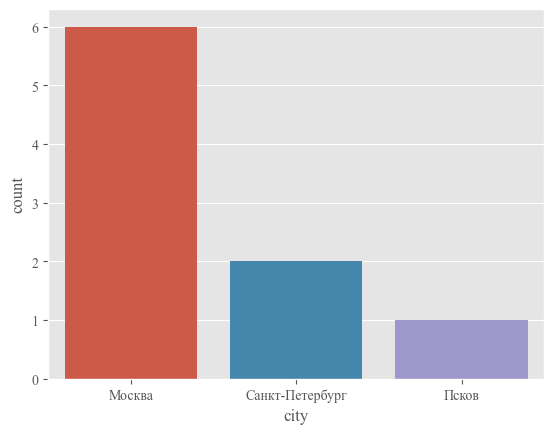

In [23]:
sns.countplot(x='city',data=df, order=df['city'].value_counts().index)

# plt.xticks(rotation = 90)

plt.show()

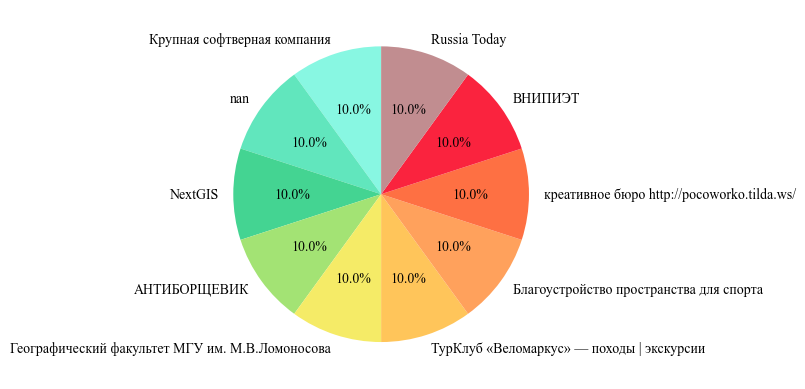

In [43]:
data = Counter(df['occupation_name'])
labels = data.keys()
sizes = data.values()

# plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=color_palette, autopct='%1.1f%%', startangle=90)

# plt.legend(title='Род занятий', labels = labels, loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

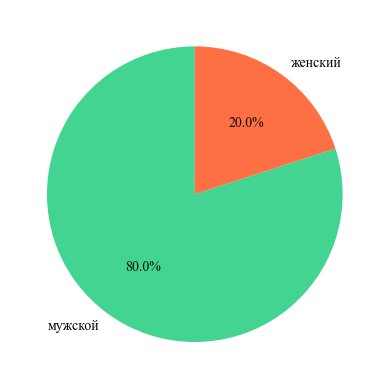

In [45]:
data = Counter(df['gender'])
labels = data.keys()
sizes = data.values()

# plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=color_palette_1, autopct='%1.1f%%', startangle=90)

# plt.legend(title='Пол', labels = labels, loc="center right", bbox_to_anchor=(0.8, 0, 0.5, 1))

plt.show()